# Explore Telco

Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

Do your work in a notebook named explore_telco. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from wrangle import wrangle_telco
from prepare import telco_split
import explore

### Exercise 1
Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [2]:
df = wrangle_telco()
train, validate, test = telco_split(df)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 1289 to 1593
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1017 non-null   object 
 1   monthly_charges  1017 non-null   float64
 2   tenure           1017 non-null   int64  
 3   total_charges    1017 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 39.7+ KB


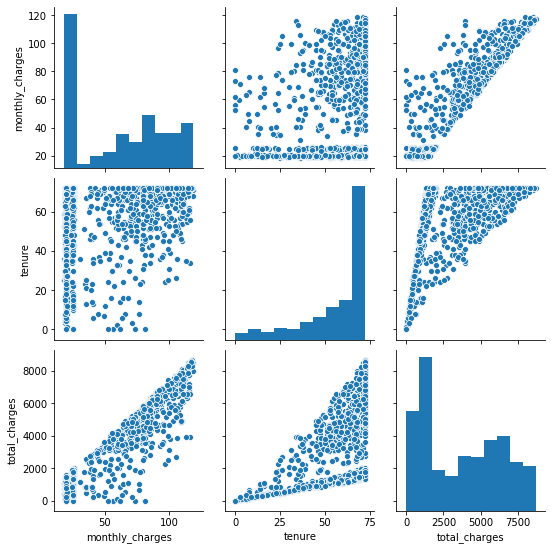

In [5]:
sns.pairplot(train)
plt.show()

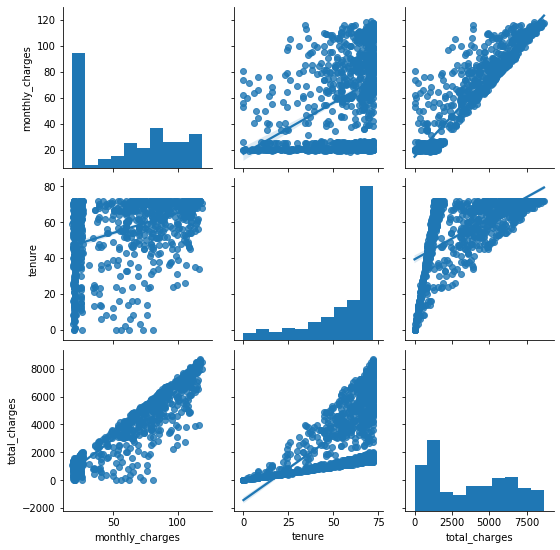

In [11]:
explore.plot_variable_pairs(train)


In [10]:
def plot_variable_pairs(df, drop_scaled_columns = True):
    if drop_scaled_columns:
        scaled_columns = [c for c in df.columns if c.endswith('_scaled')]
        df = df.drop(columns = scaled_columns)
    
    g = sns.PairGrid(df)
    g.map_diag(plt.hist) 
    g.map_offdiag(sns.regplot)
    plt.show()
    return g

### Exercise 2
Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [ ]:
train.head()

In [14]:
explore.month_to_years(train)

,customer_id,monthly_charges,tenure,total_charges,tenure_years
1289,7639-LIAYI,79.75,52,4217.80,4
941,5709-LVOEQ,80.85,0,0.00,0
79,0479-HMSWA,105.45,26,2715.30,2
187,1098-KFQEC,19.40,55,1083.00,4
986,5970-GHJAW,19.95,46,862.40,3
...,...,...,...,...,...
441,2664-XJZNO,104.90,72,7559.55,6
98,0567-XRHCU,43.95,69,2960.10,5
886,5334-AFQJB,25.10,72,1789.90,6
322,2001-MCUUW,108.65,46,4903.20,3


In [ ]:
def month_to_years(df):
    df['tenure_years'] = (df.tenure / 12).apply(math.floor)
    return df

### Exercise 3
Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

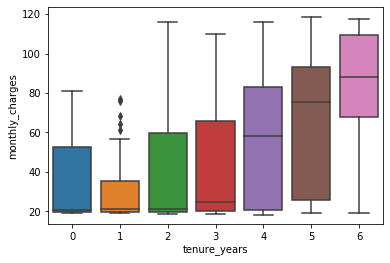

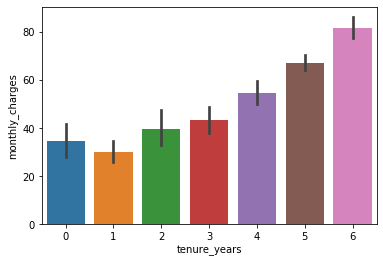

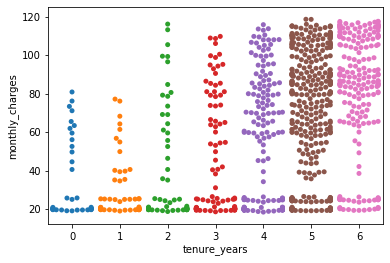

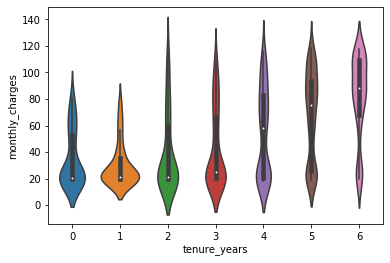

In [17]:
explore.plot_categorical_and_continuous_vars(train, 'monthly_charges', 'tenure_years')

In [16]:
def plot_categorical_and_continuous_vars(df, continous, categorical):
    sns.boxplot(data = df, y = continous, x = categorical)
    plt.show()
    sns.barplot(data = df, y = continous, x = categorical)
    plt.show()
    sns.swarmplot(data = df, y = continous, x = categorical)
    plt.show()
    sns.violinplot(data = df, y = continous, x = categorical)
    plt.show()

### Exercise 4
Save the functions you have written to create visualizations in a file named explore.py. Rewrite your notebook code so that you are using the functions imported from this file.

### Exercise 5
Explore your dataset with any other visualizations you think will be helpful.

### Exercise 6
In a seperate notebook, use the functions you have developed in this exercise with the mall customers dataset.